In [1]:
import pandas as pd
import numpy as np
import ddfloww

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [ ]:
# Can for a VERY long time; uncomment and run with caution!
# ddfloww.save_df()

In [2]:
df = ddfloww.getprep_zillow('parcelid', 'id', 'airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
                'buildingqualitytypeid', 'decktypeid', 'fips', 'hashottuborspa', 'heatingorsystemtypeid',
                'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'propertylandusetypeid', 'rawcensustractandblock',
                'regionidcity', 'regionidcounty', 'regionidneighborhood', 'regionidzip', 'storytypeid',
                'typeconstructiontypeid', 'fireplaceflag', 'taxdelinquencyflag')

In [3]:
# cutoff: columns that have 50% or more null values will be removed
df = df.drop(columns=['airconditioningtypeid', 'architecturalstyletypeid', 'buildingclasstypeid',
                    'decktypeid', 'basementsqft', 'hashottuborspa', 'storydesc', 'typeconstructiondesc',
                    'storytypeid', 'typeconstructiontypeid', 'taxdelinquencyflag',
                    'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15',
                    'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt',
                    'garagetotalsqft', 'threequarterbathnbr', 'yardbuildingsqft17', 'yardbuildingsqft26',
                    'numberofstories', 'taxdelinquencyyear', 'airconditioningdesc',
                    'architecturalstyledesc', 'buildingclassdesc',
                    'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
                    'regionidneighborhood', 'fireplaceflag'])

In [4]:
# imputing landtaxvaluedollarcnt

df_clean = df.dropna(subset = ['landtaxvaluedollarcnt', 'lotsizesquarefeet'])
df_dirty = df.loc[pd.isnull(df.lotsizesquarefeet)]

# Create linear regression objects
lm1 = LinearRegression(fit_intercept=True)

lm1.fit(df_clean[['landtaxvaluedollarcnt']], df_clean[['lotsizesquarefeet']])
print(lm1)

lm1_y_intercept = lm1.intercept_
print(lm1_y_intercept)

lm1_coefficients = lm1.coef_
print(lm1_coefficients)

print('Univariate - final_exam = b + m * exam1')
print('    y-intercept (b): %.2f' % lm1_y_intercept)
print('    coefficient (m): %.2f' % lm1_coefficients[0])
print()

y_pred_lm1 = lm1.predict(df_dirty[['landtaxvaluedollarcnt']])

df.loc[df.lotsizesquarefeet.isna(), 'lotsizesquarefeet'] = y_pred_lm1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)
[33089.2764505]
[[-0.01035072]]
Univariate - final_exam = b + m * exam1
    y-intercept (b): 33089.28
    coefficient (m): -0.01



In [5]:
# at this point, none would benefit by imputing with zeroes

In [6]:
df = ddfloww.auto_remove(df, cols_to_remove=['buildingqualitytypeid', 'heatingorsystemtypeid', 'propertyzoningdesc', 'unitcnt',
                                'heatingorsystemdesc'], prop_required_column=.5, prop_required_row=.75)

In [7]:
ddfloww.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
parcelid,0,0.000000,0,0.0,0,0.000000
logerror,0,0.000000,0,0.0,0,0.000000
transactiondate,0,0.000000,0,0.0,0,0.000000
id,0,0.000000,0,0.0,0,0.000000
bathroomcnt,0,0.000000,0,0.0,0,0.000000
bedroomcnt,0,0.000000,0,0.0,0,0.000000
calculatedbathnbr,109,0.068839,0,0.0,0,0.000000
calculatedfinishedsquarefeet,25,0.015789,0,0.0,0,0.000000
finishedsquarefeet12,4645,2.933561,0,0.0,0,0.000000
fips,0,0.000000,0,0.0,0,0.000000


In [8]:
# remove the rows that cannot be reasonably imputed.
df = df.dropna()

In [9]:
df = df.loc[(df['regionidcity'] != 'nan')]
df = df.loc[(df['regionidzip'] != 'nan')]

In [10]:
ddfloww.missing_values_col(df)

,num_missing,missing_percentage,num_empty,empty_percentage,nan_count,nan_percentage
parcelid,0,0.0,0,0.0,0,0.0
logerror,0,0.0,0,0.0,0,0.0
transactiondate,0,0.0,0,0.0,0,0.0
id,0,0.0,0,0.0,0,0.0
bathroomcnt,0,0.0,0,0.0,0,0.0
bedroomcnt,0,0.0,0,0.0,0,0.0
calculatedbathnbr,0,0.0,0,0.0,0,0.0
calculatedfinishedsquarefeet,0,0.0,0,0.0,0,0.0
finishedsquarefeet12,0,0.0,0,0.0,0,0.0
fips,0,0.0,0,0.0,0,0.0


In [11]:
df.shape

(150150, 29)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bf75fd0>,
      dtype=object)

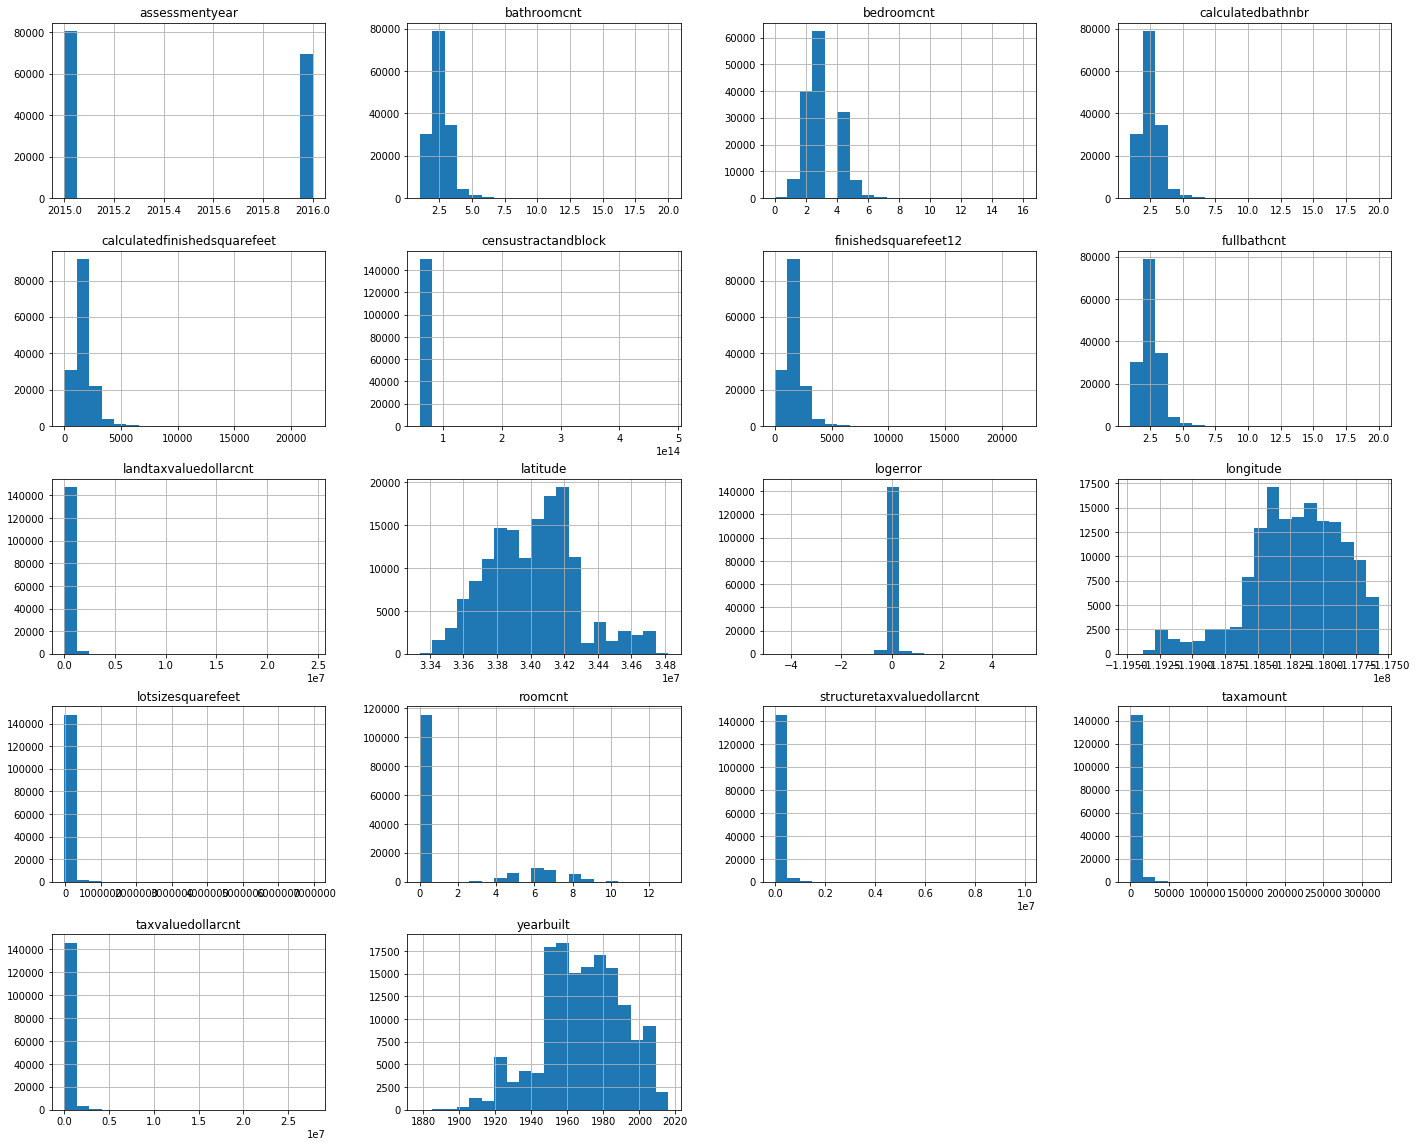

In [12]:
df.hist(figsize=(24, 20), bins=20)

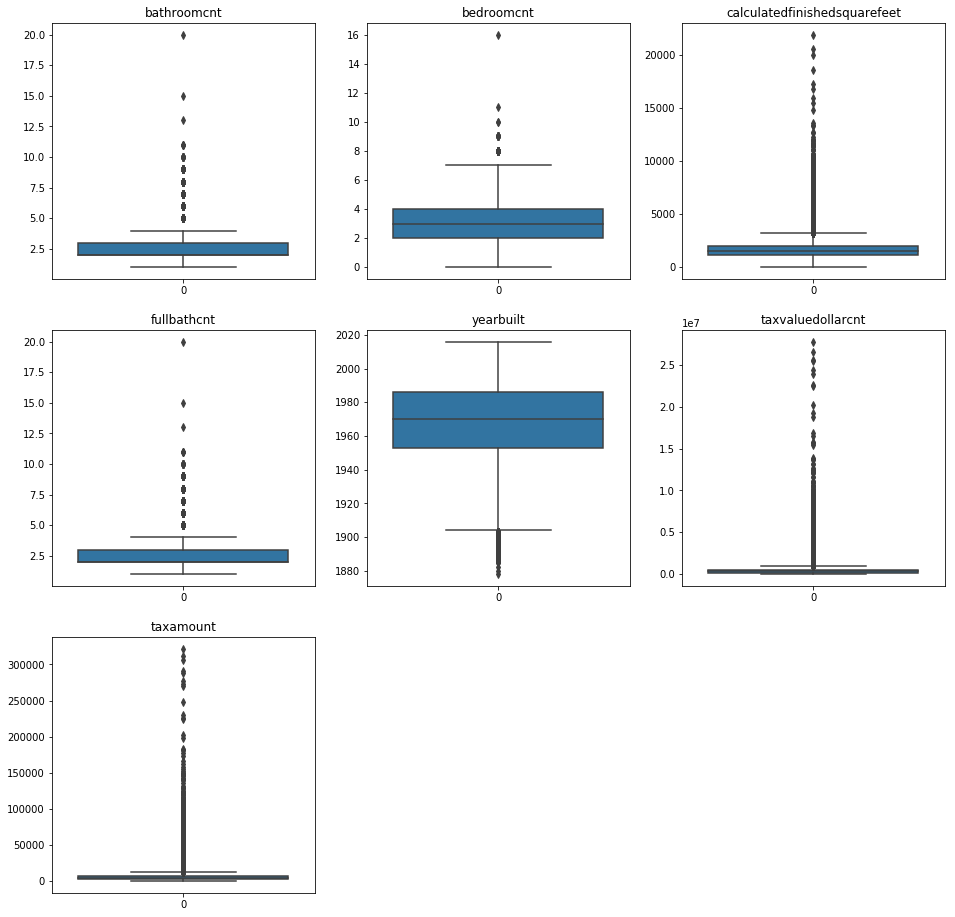

In [13]:
plt.figure(figsize=(16,16))
for i, col in enumerate(['bathroomcnt',
          'bedroomcnt',
          'calculatedfinishedsquarefeet',
          'fullbathcnt',
          'yearbuilt',
          'taxvaluedollarcnt',
          'taxamount'
         ]):
    plot_number = i + 1
    plt.subplot(3,3,plot_number)
    plt.title(col)
    sns.boxplot(data=df[col])

In [ ]:
# Remove outliers or nonsensical observations
df = df[df.bathroomcnt <= 12.5]
df = df[df.calculatedfinishedsquarefeet <= 17500]
df = df[df.fullbathcnt <= 12.5]
df = df[df.taxvaluedollarcnt <= 20000000.0]
df = df[df.taxamount <= 200000]
df.sample(10)